In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import pandas as pds
import pickle
from pathlib import Path
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import datetime
pds.set_option('display.max_rows', 500)
import seaborn as sns
sns.set()

In [4]:
# Read the measured streamflow:
save_date = 'july20'
savepath = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\discharge_measurements\processed_by_hh\combined_gauges_LV_VI_raw_%s.p" % save_date)
combined_dict_npc_met_office = pickle.load(open( savepath, "rb" ) )
savepath = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\discharge_measurements\processed_by_hh\combined_gauges_LV_VI_raw_splitted_%s.p" % save_date)
splitted_gauge_dict = pickle.load(open( savepath, "rb" ) )
savepath = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\discharge_measurements\processed_by_hh\combined_gauges_LV_VI_highqual_%s.p" % save_date)
combined_dict_high_qual = pickle.load(open( savepath, "rb" ) )
savepath = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\discharge_measurements\processed_by_hh\combined_gauges_LV_VI_highqual_splitted_%s.p" % save_date)
splitted_gauge_dict_high_qual = pickle.load(open( savepath, "rb" ) )

(-7305.0, 18871.0)

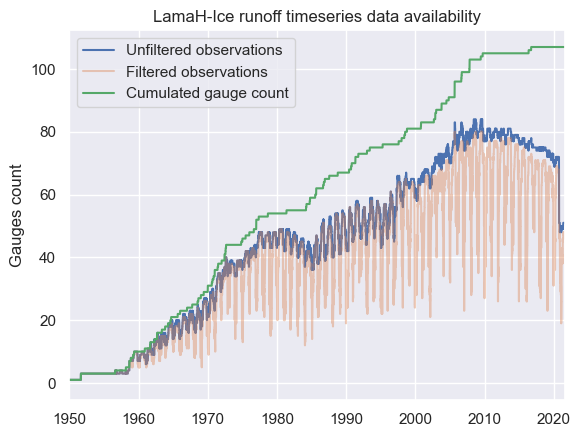

In [5]:
# Quick viz
values_dict = dict()
for site in combined_dict_npc_met_office.keys():
    df = combined_dict_npc_met_office[site]['Value'].copy()
    df.index = pds.to_datetime(df.index)
    df.index = df.index.date
    values_dict[site] = df
values_df = pds.DataFrame(values_dict)
values_df.index = pds.to_datetime(values_df.index)

values_df.count(axis=1).plot(label='Unfiltered observations')

values_dict = dict()
for site in splitted_gauge_dict_high_qual.keys():
    df = splitted_gauge_dict_high_qual[site]['Value'].copy()
    df.index = pds.to_datetime(df.index)
    df.index = df.index.date
    values_dict[site] = df
values_df_filtered = pds.DataFrame(values_dict)
values_df_filtered.index = pds.to_datetime(values_df_filtered.index)
values_df_filtered.count(axis=1).plot(label='Filtered observations',alpha=0.4)

# Cumulated gauge count
index = index=pds.date_range('1930-01-01','2021-09-30')
data = np.zeros(len(index))
cum_values_df = pds.DataFrame(data=data,index=index)
cum_values_df.columns=['Value']
for site in combined_dict_npc_met_office.keys():
    df = combined_dict_npc_met_office[site]['Value'].copy()
    df.index = pds.to_datetime(df.index)
    df.index = df.index.date
    df_dropna = df.dropna()
    start_date = df.index[0]
    cum_values_df['Value'][start_date:]+=1
cum_values_df['Value'].plot(label='Cumulated gauge count')

plt.legend()
plt.title('LamaH-Ice runoff timeseries data availability')
plt.ylabel('Gauges count')
# plt.grid()
plt.xlim(['1950-01-01','2021-09-01'])

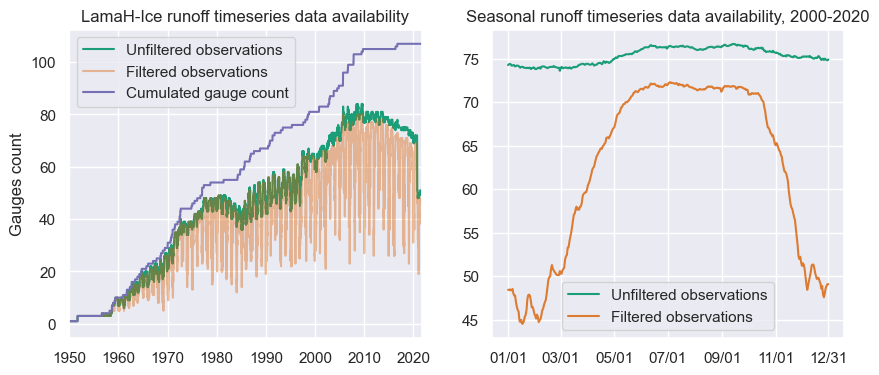

In [14]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
# Quick viz
values_dict = dict()
for site in combined_dict_npc_met_office.keys():
    df = combined_dict_npc_met_office[site]['Value'].copy()
    df.index = pds.to_datetime(df.index)
    df.index = df.index.date
    values_dict[site] = df
values_df = pds.DataFrame(values_dict)
values_df.index = pds.to_datetime(values_df.index)
values_df.count(axis=1).plot(label='Unfiltered observations',ax=ax1,c='#1b9e77')

values_dict = dict()
for site in splitted_gauge_dict_high_qual.keys():
    df = splitted_gauge_dict_high_qual[site]['Value'].copy()
    df.index = pds.to_datetime(df.index)
    df.index = df.index.date
    values_dict[site] = df
values_df_filtered = pds.DataFrame(values_dict)
values_df_filtered.index = pds.to_datetime(values_df_filtered.index)
values_df_filtered.count(axis=1).plot(label='Filtered observations',alpha=0.4,ax=ax1, c='#d95f02')

# Cumulated gauge count
index = index=pds.date_range('1930-01-01','2021-09-30')
data = np.zeros(len(index))
cum_values_df = pds.DataFrame(data=data,index=index)
cum_values_df.columns=['Value']
for site in combined_dict_npc_met_office.keys():
    df = combined_dict_npc_met_office[site]['Value'].copy()
    df.index = pds.to_datetime(df.index)
    df.index = df.index.date
    df_dropna = df.dropna()
    start_date = df.index[0]
    cum_values_df['Value'][start_date:]+=1
cum_values_df['Value'].plot(label='Cumulated gauge count',ax=ax1,c='#7570b3')

ax1.legend()
ax1.set_title('LamaH-Ice runoff timeseries data availability')
ax1.set_ylabel('Gauges count')
# plt.grid()
ax1.set_xlim(['1950-01-01','2021-09-01'])

to_plot = values_df['2000-01-01':'2019-12-31'].count(axis=1).groupby(values_df['2000-01-01':'2019-12-31'].index.strftime("%m/%d")).mean()
to_plot.plot(label='Unfiltered observations',ax=ax2,c='#1b9e77')
to_plot2 = values_df_filtered['2000-01-01':'2019-12-31'].count(axis=1).groupby(values_df_filtered['2000-01-01':'2019-12-31'].index.strftime("%m/%d")).mean()
to_plot2.plot(label='Filtered observations',ax=ax2, alpha=0.8, c='#d95f02')
ax2.set_title('Seasonal runoff timeseries data availability, 2000-2020')
ax2.legend()
ax2.set_xticks(np.array([0,60,121,182,244,305,365]), ['01/01','03/01','05/01','07/01','09/01','11/01','12/31'])#to_plot.index[[0,30,60,90,120,150,180,210,240,270,300,330,360]])
ax1.set_ylabel('Gauges count')

savepath = Path(r"C:\Users\hordurbhe\Dropbox\UW\lamah_ice\plots\gauge_data_availability\lamah_ice_data_avail_final.png")
plt.savefig(savepath,dpi=300)

In [ ]:
# Printing out some details that are included in the paper:

In [44]:
# Maximum number of simultaniously reporting gauges:
values_df.count(axis=1).max()

84

In [45]:
# when?
values_df.count(axis=1).idxmax()

Timestamp('2008-06-11 00:00:00')

In [15]:
# Minimum number between 2006 and 2020:
values_df.count(axis=1)['2006-01-01':'2019-12-31'].min()

70

In [54]:
# The mean number of filtered obs gauges in summer:
to_plot2['06/01':'08/31'].mean()

71.79456521739131

In [59]:
(2*(to_plot2['01/01':'02/28'].mean())+to_plot2['12/01':'12/31'].mean())/3

48.162329141607444

In [21]:
len(values_df_filtered['2005-06-01':'2005-07-31'].dropna(axis=1).columns)

69